In [1058]:
import numpy as np
import scipy
from skimage.io import imread
from image_compression import own_quantization_matrix, jpeg_compression, jpeg_decompression
from image_compression import pca_visualize, jpeg_visualize
from image_compression import get_pca_metrics_graph, get_jpeg_metrics_graph
import matplotlib.pyplot as plt

%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# PCA compression & decompression

<Figure size 432x288 with 0 Axes>

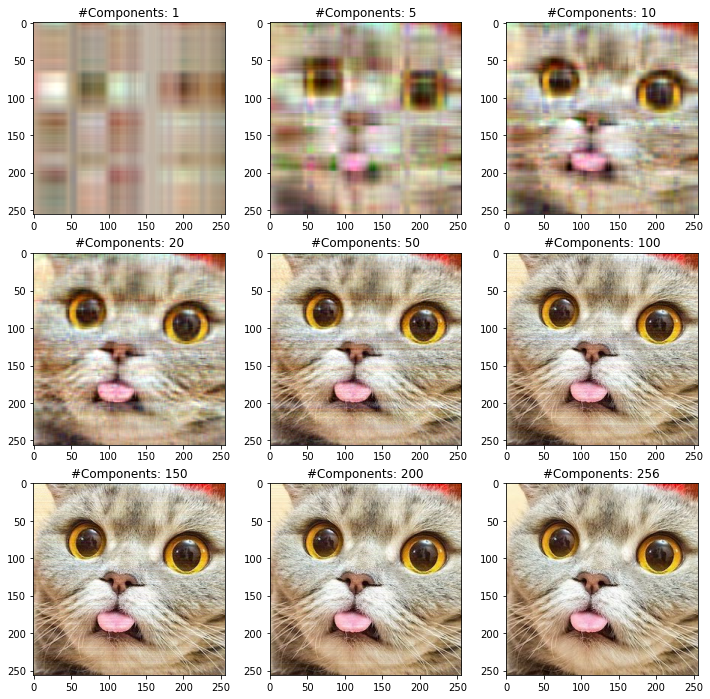

In [439]:
pca_visualize()

# JPEG

### Compression

In [ ]:
img = imread('cat.jpg')

In [1067]:
Q = 30 # quality factor
quantization_matrices = [own_quantization_matrix(y_quantization_matrix, Q), own_quantization_matrix(color_quantization_matrix, Q)]
a = jpeg_compression(img, quantization_matrices)

In [1074]:
print('Quality factor:', Q)
print('Initial size (bytes):', img.shape[0]*img.shape[1])
print('Compressed size (bytes):', np.array(sum(sum(a,[]),[])).shape[0])

Quality factor: 30
Initial size (bytes): 65536
Compressed size (bytes): 22235


### Decompression

In [1069]:
from image_compression import zigzag
import image_compression as ic

In [1079]:
decompressed_img, Y_blocks = jpeg_decompression(a, img.shape, quantization_matrices)

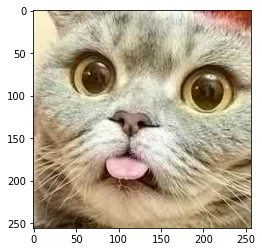

In [1080]:
plt.imshow(decompressed_img)

### Quality factor comparison

<Figure size 432x288 with 0 Axes>

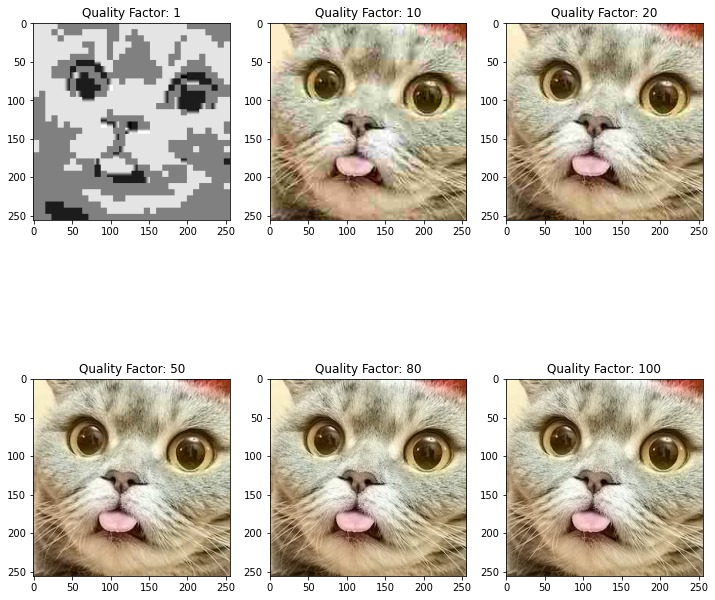

In [1081]:
jpeg_visualize()

# Metrics

C:\Program Files\Python39\lib\site-packages\numpy\lib\npyio.py:719: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  val = np.asanyarray(val)


<Figure size 432x288 with 0 Axes>

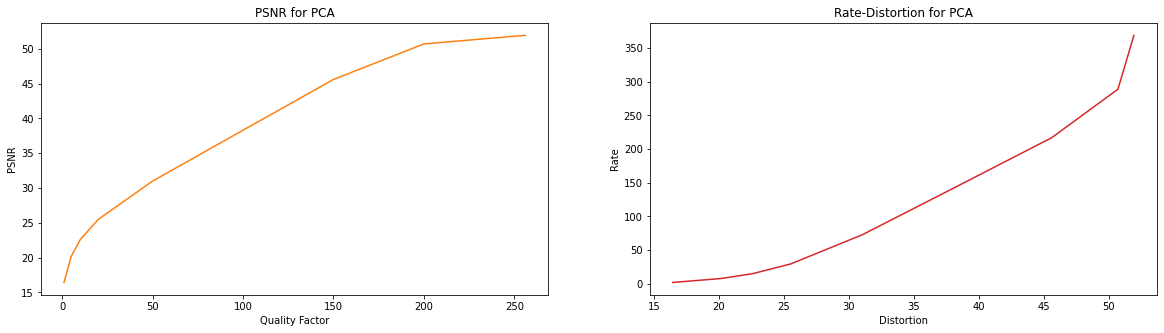

In [1059]:
get_pca_metrics_graph()

<Figure size 432x288 with 0 Axes>

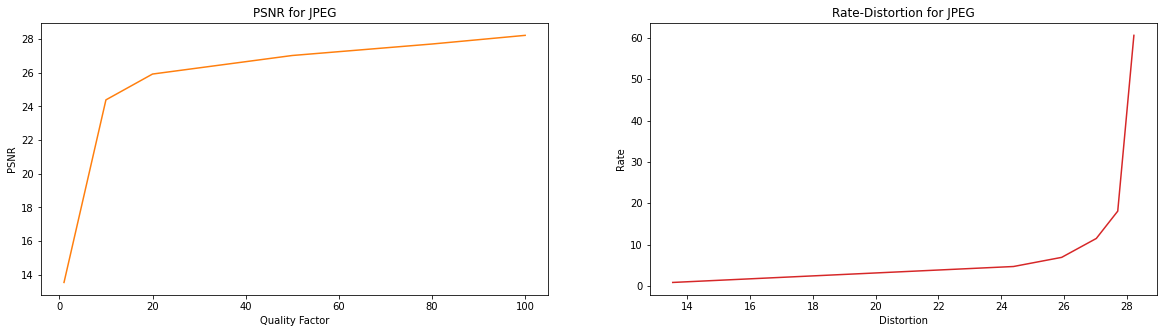

In [1060]:
get_jpeg_metrics_graph()